<a href="https://colab.research.google.com/github/afrihel-code/AI.-WorkShop.RIHEL/blob/main/Rihel_homework_exo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving homework.csv to homework (3).csv
=== Régression Simple ===
Intercept: 33003.36216890106
Coefficients(lotsize): 6.885408879999409
MSE: 543921224.559349
R2: 0.18583856088525563


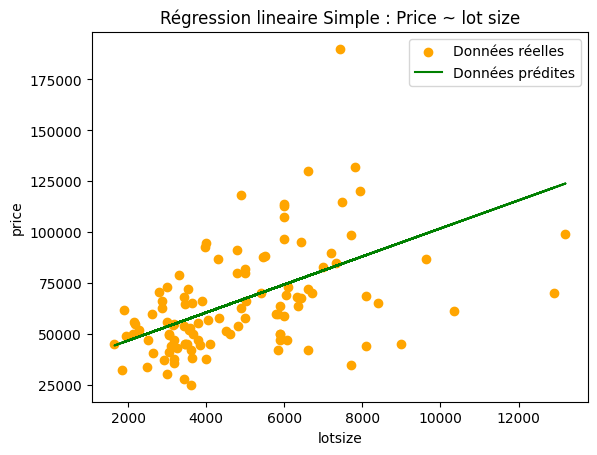


=== Régression Multiple ===
Intercept: -2513.0025788389903
Coefficients :
lotsize: 3.65
bedrooms: 955.87
bathrms: 13582.24
stories: 7204.65
garagepl: 4611.65
driveway_yes: 6940.01
recroom_yes: 4556.74
fullbase_yes: 6377.02
gashw_yes: 15128.96
airco_yes: 12674.62
prefarea_yes: 7815.19
Mean Squared Error: 256524986.51986226
R²: 0.6160238969106216


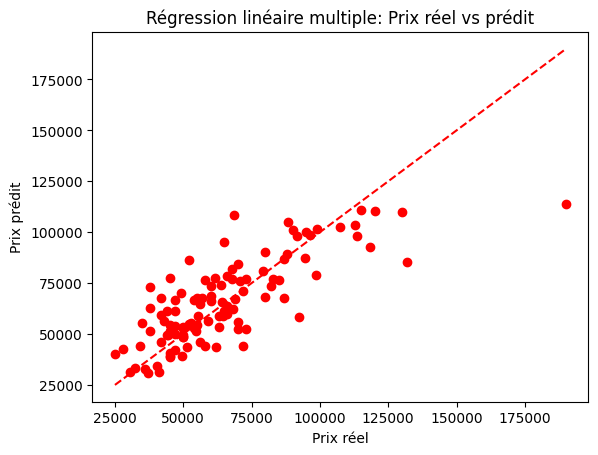

In [ ]:
# Upload du fichier and Lecture du CSV

from google.colab import files
files.upload()
import pandas as pd
data = pd.read_csv('homework.csv')

# Import des bibliothèques pour la suite


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


# --- RÉGRESSION LINÉAIRE SIMPLE ---
# Sélection des variables
X_simple = data[['lotsize']]
Y = data['price']
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(X_simple,Y,test_size=0.2,random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s,Y_train_s)

Y_pred_s = model_simple.predict(X_test_s)


print("=== Régression Simple ===")
print("Intercept:",model_simple.intercept_)
print("Coefficients(lotsize):",model_simple.coef_[0])
print("MSE:",mean_squared_error(Y_test_s,Y_pred_s))
print("R2:",r2_score(Y_test_s,Y_pred_s))



plt.scatter(X_test_s,Y_test_s,color='orange',label='Données réelles')
plt.plot(X_test_s,Y_pred_s,color='green',label='Données prédites')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Régression lineaire Simple : Price ~ lot size')
plt.legend()
plt.show()



# --- RÉGRESSION LINÉAIRE MULTIPLE ---
# Sélection des colonnes explicatives
cols = ['lotsize', 'bedrooms', 'bathrms', 'stories',
        'driveway', 'recroom', 'fullbase', 'gashw',
        'airco', 'garagepl', 'prefarea']

# Convertir les colonnes catégorielles en 0/1
data_encoded = pd.get_dummies(data[cols], drop_first=True)

# Variables X et Y pour la régression multiple
X_multi = data_encoded
Y_multi = data['price']

# Séparer train/test
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42)

# Créer et entraîner le modèle multiple
model_multi = LinearRegression()
model_multi.fit(X_train_m, Y_train_m)

# Prédictions
Y_pred_m = model_multi.predict(X_test_m)

# Affichage des résultats
print("\n=== Régression Multiple ===")
print("Intercept:", model_multi.intercept_)
print("Coefficients :")
for col, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{col}: {coef:.2f}")

print("Mean Squared Error:", mean_squared_error(Y_test_m, Y_pred_m))
print("R²:", r2_score(Y_test_m, Y_pred_m))

# Optionnel : graphique réel vs prédit pour la régression multiple
plt.scatter(Y_test_m, Y_pred_m, color='red')
plt.plot([Y_test_m.min(), Y_test_m.max()], [Y_test_m.min(), Y_test_m.max()], 'r--')
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Régression linéaire multiple: Prix réel vs prédit')
plt.show()